In [769]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [770]:
import openai

In [771]:
openai.__version__

'0.27.8'

In [772]:
import numpy as np
from webcolors import hex_to_rgb
%matplotlib inline

from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

init_notebook_mode(connected=True)  

## Load Data

In [773]:
def load_raw_data():
    df_pubmed = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="Harmonized Information Extracti")
    df_pubmed['publication_type'] = "biomedical_journal"
    df_acl = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="ACLEMNLP Google Scholar")
    df_acl['publication_type'] = "nlp_venue"
    return df_pubmed, df_acl

In [774]:
df_pubmed, df_acl = load_raw_data()

In [775]:
def load_raw_data_included_all():
    df_pubmed, df_acl = load_raw_data()
    df_included = df_pubmed[df_pubmed['Included'] == 1.0]
    df_acl_included = df_acl[df_acl['Included'] == 1.0]
    df = pd.concat([df_included, df_acl_included], ignore_index=True)
    df['year'] = df['year'].astype(int)
    print(df_pubmed.shape, df_included.shape, df_acl.shape, df_acl_included.shape)
    return df

In [777]:
df_2024 = pd.read_excel("data/Scoping_review_text-analysis_extraction_2024.xlsx", sheet_name="SED Version Sijing Extractions ")
## ALIGN WITH PREVIOUS NAMES
# Replace 'Association for Computational Linguistics' with 'ACL'
df_2024['journal'] = df_2024['journal'].str.replace('Association for Computational Linguistics', 'ACL', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('BMC bioinformatics', 'BMC Bioinformatics', regex=False)
df_2024['journal'] = df_2024['journal'].str.replace('Frontiers in psychiatry', 'Frontiers in Psychiatry', regex=False)

# Replace 'ACL Findings' followed by any characters with 'ACL/Findings'
df_2024['journal'] = df_2024['journal'].str.replace(r'ACL Findings.*', 'ACL/ Findings', regex=True)
df_2024['journal'] = df_2024['journal'].str.replace(r'Findings of the ACL.*', 'ACL/ Findings', regex=True)

df_2024['journal'] = df_2024['journal'].str.replace(r'EMNLP.*', 'EMNLP', regex=True)


In [743]:
df_2024['publication_type'] = np.where(
    df_2024['journal'].str.contains('EMNLP|ACL'), 
    'nlp_venue', 
    'biomedical_journal'
)

In [744]:
df_2024_included = df_2024[df_2024['Included'] == 1.0]
df_2024_included.loc[:, 'year'] = df_2024_included['year'].astype(int)


/Users/donevas/opt/miniconda3/lib/python3.9/site-packages/pandas/core/indexing.py:1773: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [745]:
set(df_2024_included['journal'])

{'ACL/ Findings',
 'Artificial Intelligence in the Life Sciences',
 'Artificial intelligence in medicine',
 'BMC Bioinformatics',
 'BMC Medical Informatics and Decision Making',
 'BMJ Health & Care Informatics',
 'Bioinformatics',
 'Chemical Research in Toxicology',
 'Frontiers in Genetics',
 'Frontiers in Neuroinformatics',
 'Frontiers in Pharmacology',
 'Frontiers in Psychiatry',
 'Genes & Genomics',
 'Indian Dermatology Online Journal',
 'Informatics in Medicine Unlocked',
 'Journal of Biomedical Informatics',
 'Journal of Biomedical Semantics',
 'Journal of Computational Biology',
 'Journal of Medical Internet Research',
 'Journal of the American Heart Association',
 'Journal of the American Medical Informatics Association',
 'Molecular & Cellular Proteomics',
 'Neurocomputing',
 'Plos one',
 'Proceedings of the 68th Annual Meeting of the German Association of Medical Informatics, Biometry, and Epidemiology',
 'Radiology',
 'Scientific Reports',
 'Systematic Reviews',
 'The 22nd Wo

In [746]:
df_2024_included.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    49
nlp_venue             10
Name: title, dtype: int64

In [747]:
df = load_raw_data_included_all()

(504, 71) (89, 71) (491, 68) (51, 68)


In [748]:
df = pd.concat([df, df_2024_included], ignore_index=True)

In [749]:
df.shape

(199, 73)

In [750]:
df.groupby("publication_type")["title"].count()

publication_type
biomedical_journal    138
nlp_venue              61
Name: title, dtype: int64

In [515]:
df.head(3)

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40,Unnamed: 32
0,"Abdelkader, W. and Navarro, T. and Parrish, R....",10.2196/29398,https://doi.org/10.2196/29398,A Deep Learning Approach to Refine the Identif...,JMIR Research Protocols,2021,BVI,1.0,NaN,Text Classification,...,"Abdelkader, Wael Navarro, Tamara Parrish, Rick...",A Deep Learning Approach to Refine the Identif...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
1,"Alachram, H. and Chereda, H. and Beisbarth, T....",10.1371/journal.pone.0258623,https://doi.org/10.1371/journal.pone.0258623,Text mining-based word representations for bio...,PLoS ONE [Electronic Resource],2021,BVI,1.0,NaN,Information Extraction,...,"Alachram, Halima Chereda, Hryhorii Beisbarth, ...",Text mining-based word representations for bio...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN
2,"Ambalavanan, A. K. and Devarakonda, M. V.",10.1016/j.jbi.2020.103578,https://doi.org/10.1016/j.jbi.2020.103578,Using the contextual language model BERT for m...,Journal of Biomedical Informatics,2020,BVI,1.0,NaN,Text Classification,...,"Ambalavanan, Ashwin Karthik Devarakonda, Murth...",Using the contextual language model BERT for m...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN,NaN


### random sample for a pilot with student

In [138]:
# Sample 3 random rows from df_included
df_included_sampled = df_pubmed[df_pubmed['Included'] == 1.0].sample(n=3, random_state=42)

# Sample 2 random rows from df_acl_included
df_acl_included_sampled = df_acl[df_acl['Included'] == 1.0].sample(n=2, random_state=42)

# Combine the sampled DataFrames
combined_df = pd.concat([df_included_sampled, df_acl_included_sampled])
combined_df_first_cols = combined_df.iloc[:, :6]

# Display the combined DataFrame
combined_df.head()

,author,doi,Link to paper,title,journal,year,Extracted by,Included,Reason for exclusion,Target application,...,m3,n1,ST,m1,c5,c2,c1,OP,publication_type,Unnamed: 40
219,"Li, D. and Xiong, Y. and Hu, B. and Tang, B. a...",10.1186/s12911-021-01614-7,https://doi.org/10.1186/s12911-021-01614-7,Drug knowledge discovery via multi-task learni...,BMC Medical Informatics & Decision Making,2021.0,SDO,1.0,NaN,Information Extraction,...,"Research Support, Non-U.S. Gov't","Li, Dongfang Xiong, Ying Hu, Baotian Tang, Buz...",Drug knowledge discovery via multi-task learni...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
265,"Martenot, V. and Masdeu, V. and Cupe, J. and G...",10.1186/s12911-022-02085-0,https://doi.org/10.1186/s12911-022-02085-0,LiSA: an assisted literature search pipeline f...,BMC Medical Informatics & Decision Making,2022.0,SDO,1.0,NaN,Information Retrieval,...,"Research Support, Non-U.S. Gov't","Martenot, Vincent Masdeu, Valentin Cupe, Jean ...",LiSA: an assisted literature search pipeline f...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
166,"Ji, Z. and Wei, Q. and Xu, H.",NaN,https://doi.org/,BERT-based Ranking for Biomedical Entity Norma...,AMIA Summits on Translational Science Proceedings,2020.0,SDO,1.0,NaN,Entity Normalization/Linking,...,NaN,"Ji, Zongcheng Wei, Qiang Xu, Hua and ASReview_...",BERT-based Ranking for Biomedical Entity Norma...,NaN,NaN,NaN,NaN,NaN,biomedical_journal,NaN
132,"['Liu, Z.', 'Xiong, C.', 'Dai, Z.', 'Sun, S.',...",10.18653/v1/2020.findings-emnlp.216,https://aclanthology.org/2020.findings-emnlp.2...,Adapting open domain fact extraction and verif...,Association for Computational Linguistics/ Fin...,2020.0,SDO,1.0,NaN,Fact Verification,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nlp_venue,NaN
256,"['Lu, Q.', 'Dou, D.', 'Nguyen, T.']",NaN,https://aclanthology.org/2022.findings-emnlp.3...,ClinicalT5: A generative language model for cl...,Association for Computational Linguistics/ Fin...,2022.0,SDO,1.0,NaN,Multi-Domain,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nlp_venue,NaN


In [139]:
combined_df_first_cols.to_csv("sample_to_test_new_extractor.csv")

In [140]:
combined_df.to_csv("full_sample_to_test_new_extractor.csv")

# Summer School SRs

In [141]:
filtered_df_sr = df[df['Domain of automated approach'].str.contains('Systematic', na=False)]
filtered_df_sr = filtered_df_sr[['Domain of automated approach', 'Target application']]
filtered_df_sr[['Approach Keywords', 'Application description']] = filtered_df_sr['Domain of automated approach'].str.split(':', 1, expand=True)
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews/', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace(' Systematic Reviews', '')
filtered_df_sr['Approach Keywords'] = filtered_df_sr['Approach Keywords'].str.replace('Systematic Reviews', '')

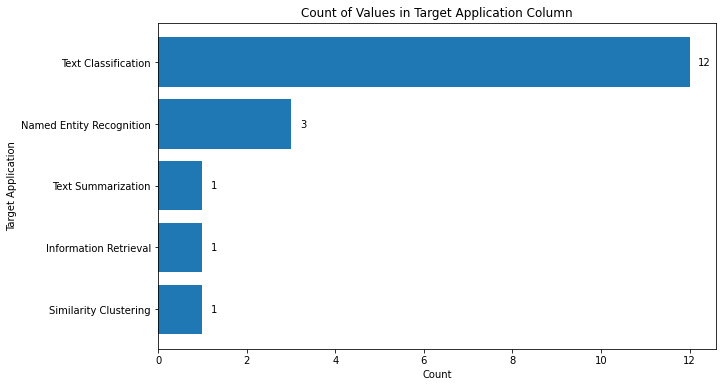

In [142]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Target application'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Target Application')
plt.xlabel('Count')
plt.title('Count of Values in Target Application Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [143]:
filtered_df_sr.head()

,Domain of automated approach,Target application,Approach Keywords,Application description
2,Literature Screening/ Combination of Selection...,Text Classification,Literature Screening/ Combination of Selection...,Screening scientific articles for systematic ...
4,Literature Screening/ Systematic Reviews/ Moxi...,Text Classification,Literature Screening/ Moxibustion for improvi...,Screening scientific articles for systematic ...
7,Literature Screening/ PICO Recognition/ Biome...,Named Entity Recognition,Literature Screening/ PICO Recognition/ Biome...,PICO recognition (as NER) to improve referenc...
12,Literature Screening/ Systematic Reviews/ Neur...,Text Classification,Literature Screening/ Neurosurgery,Classification of Short Scientific Texts to i...
13,Literature-Based Discovery/ Thematically Coher...,Similarity Clustering,Literature-Based Discovery/ Thematically Coher...,Assist domain specialists in comprehending th...


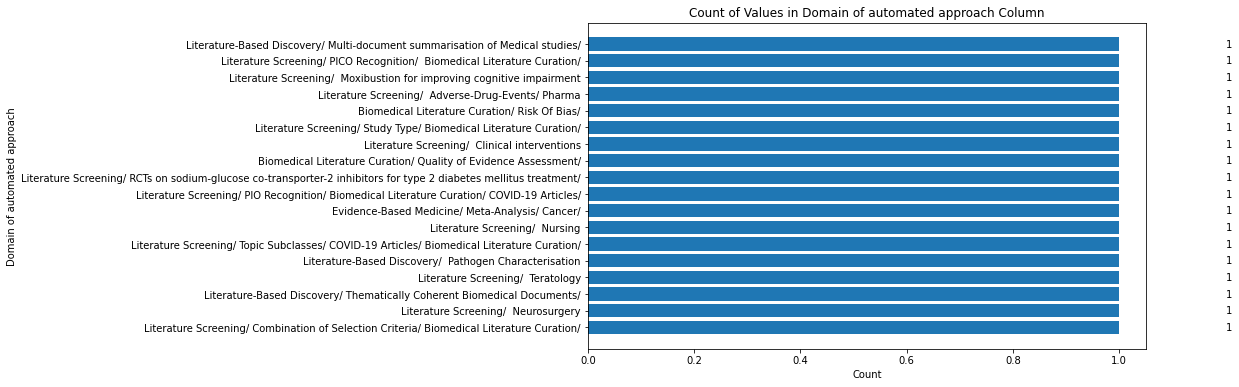

In [144]:
# Counting values in the 'Target application' column
value_counts = filtered_df_sr['Approach Keywords'].value_counts()

# Sorting by highest count
value_counts = value_counts.sort_values(ascending=True)

# Increasing image size
plt.figure(figsize=(10, 6))

# Creating a horizontal bar plot with sorted values
plt.barh(value_counts.index, value_counts.values)
plt.ylabel('Domain of automated approach')
plt.xlabel('Count')
plt.title('Count of Values in Domain of automated approach Column')

# Displaying count values next to each bar
for i, count in enumerate(value_counts.values):
    plt.text(count + 0.2, i, str(count), va='center')

plt.show()

In [145]:
df = filtered_df_sr[['Approach Keywords','Target application']]

In [146]:
# Splitting the column and unpacking into different columns
split_columns = df['Approach Keywords'].str.split('/', expand=True)

# Renaming the split columns
split_columns.columns = [f'Level_{i+1}' for i in range(split_columns.shape[1])]

# Combining the original DataFrame with the split columns
df = pd.concat([df, split_columns], axis=1)

# Dropping the original column
df.drop(columns=['Approach Keywords'], inplace=True)
df.drop(columns=['Level_5'], inplace=True)

df['Count'] = 1
df

,Target application,Level_1,Level_2,Level_3,Level_4,Count
2,Text Classification,Literature Screening,Combination of Selection Criteria,Biomedical Literature Curation,,1
4,Text Classification,Literature Screening,Moxibustion for improving cognitive impairment,None,None,1
7,Named Entity Recognition,Literature Screening,PICO Recognition,Biomedical Literature Curation,,1
12,Text Classification,Literature Screening,Neurosurgery,None,None,1
13,Similarity Clustering,Literature-Based Discovery,Thematically Coherent Biomedical Documents,,None,1
25,Text Classification,Literature Screening,Teratology,None,None,1
31,Text Classification,Literature-Based Discovery,Pathogen Characterisation,None,None,1
39,Text Classification,Literature Screening,Topic Subclasses,COVID-19 Articles,Biomedical Literature Curation,1
54,Text Classification,Literature Screening,Nursing,None,None,1
57,Named Entity Recognition,Evidence-Based Medicine,Meta-Analysis,Cancer,,1


In [147]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
connect_values = df["Count"].to_list()
levels_combined = list(set(l1+l2))
#levels_combined
node_dict = {y:x for x, y in enumerate(levels_combined)}
node_dict

source = l1 
target = l2  
values = connect_values 

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

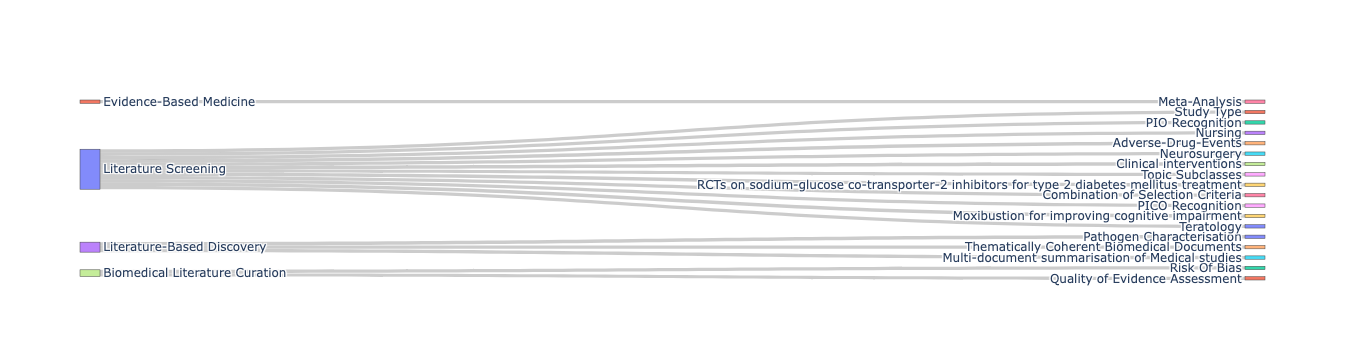

In [148]:
import plotly.graph_objects as go # Import the graphical object

fig = go.Figure( 
    data=[go.Sankey( # The plot we are interest
        # This part is for the node information
        node = dict( 
            label = levels_combined
        ),
        # This part is for the link information
        link = dict(
            source = source_node,
            target = target_node,
            value = values
        ))])

# With this save the plots 
plot(fig,
     image_filename='sankey_plot_1', 
     image='png', 
     image_width=1000, 
     image_height=600
)
# And shows the plot
fig.show()

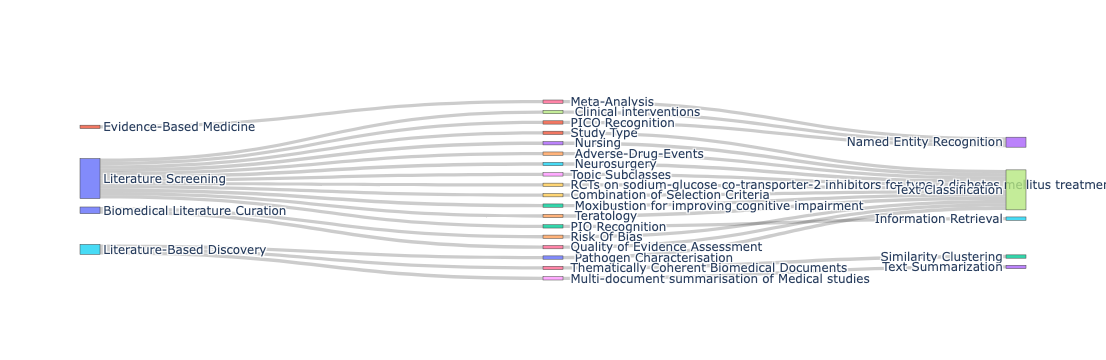

In [149]:
l1 = df["Level_1"].to_list()
l2 = df["Level_2"].to_list()
l3 = df["Target application"].to_list()
connect_values = df["Count"].to_list()

levels_combined = list(set(l1 + l2 + l3))
node_dict = {y: x for x, y in enumerate(levels_combined)}

source = l1 + l2
target = l2 + l3
values = connect_values * 2  # Duplicate for each level

source_node = [node_dict[x] for x in source]
target_node = [node_dict[x] for x in target]

values_combined = [f'Outgoing: {value}' for value in values]  # Include "Outgoing:"

fig = go.Figure(
    data=[go.Sankey(
        node=dict(
            label=levels_combined
        ),
        link=dict(
            source=source_node,
            target=target_node,
            value=values,
            label=values_combined  # Use the modified values_combined list
        ))])

# With this save the plots
plot(fig,
     image_filename='sankey_plot_1',
     image='png',
     image_width=1000,
     image_height=600)

# And show the plot
fig.show()


# viz from another paper
vis https://www.sciencedirect.com/science/article/pii/S0950584921000690

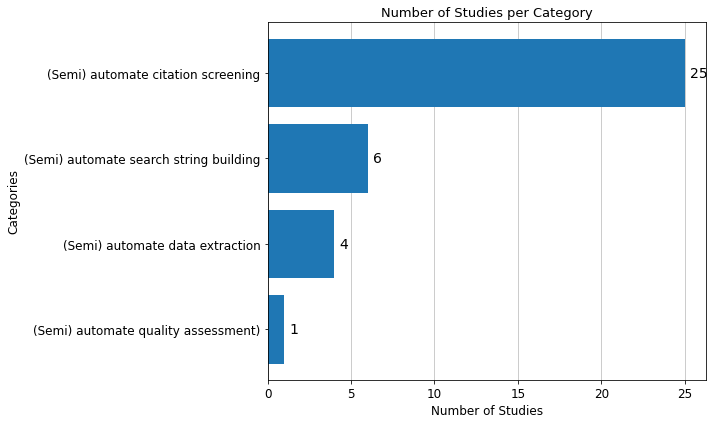

In [584]:
import matplotlib.pyplot as plt

categories = ['(Semi) automate citation screening', '(Semi) automate search string building', '(Semi) automate data extraction', '(Semi) automate quality assessment)']
nr_studies = [25, 6, 4, 1]

sorted_indices = sorted(range(len(nr_studies)), key=lambda k: nr_studies[k])
sorted_categories = [categories[i] for i in sorted_indices]
sorted_nr_studies = [nr_studies[i] for i in sorted_indices]

fig, ax = plt.subplots(figsize=(10, 6))

# Create bars and set their zorder to be higher than the grid lines
bars = ax.barh(sorted_categories, sorted_nr_studies, zorder=1)

# Add labels on the bars
for bar in bars:
    value = bar.get_width()
    ax.text(value + 0.3, bar.get_y() + bar.get_height()/2, str(value), va='center', color='black', fontsize=14)

ax.set_axisbelow(True)
ax.xaxis.grid(color='gray', alpha=0.5)

plt.ylabel('Categories', fontsize=12)  # Increase font size for ylabel
plt.xlabel('Number of Studies', fontsize=12)  # Increase font size for xlabel
plt.title('Number of Studies per Category', fontsize=13)  # Increase font size for title

# Increase font size of tick labels on both axes
ax.tick_params(axis='both', which='major', labelsize=12)

plt.tight_layout()

# Save the figure
plt.savefig('bar_chart.png', dpi=300)  # Change the filename and dpi as needed

plt.show()


In [581]:
!ls

Literature Review.ipynb
README.md
bar_chart_sr_automation_summer_school.png
data
temp-plot.html
viz
